In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#PROJECT 2
# Load dataset
iris = load_iris()

#pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


df['species'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

# Show first 5 rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [2]:

print("Dataset shape:", df.shape)

s
print("\nData types:\n", df.dtypes)


print("\nSummary statistics:\n", df.describe())


print("\nUnique species:\n", df['species'].unique())


Dataset shape: (150, 6)

Data types:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
species               object
dtype: object

Summary statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min           

In [3]:
# searcmissing values
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64


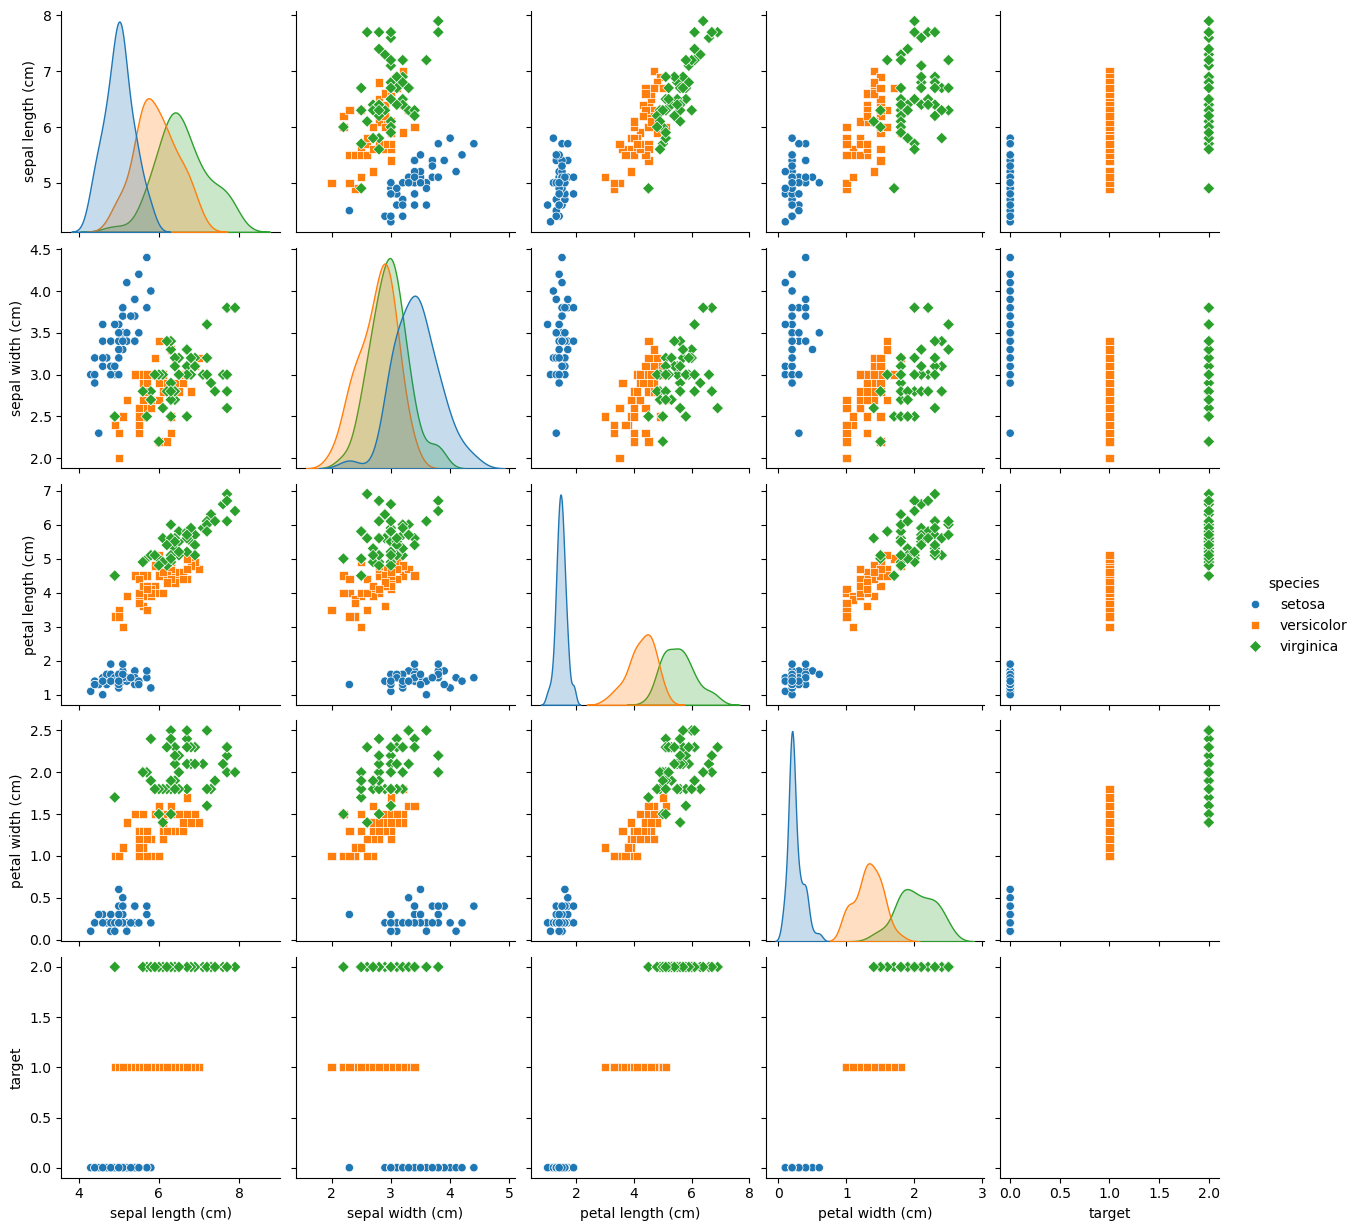

In [4]:
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()


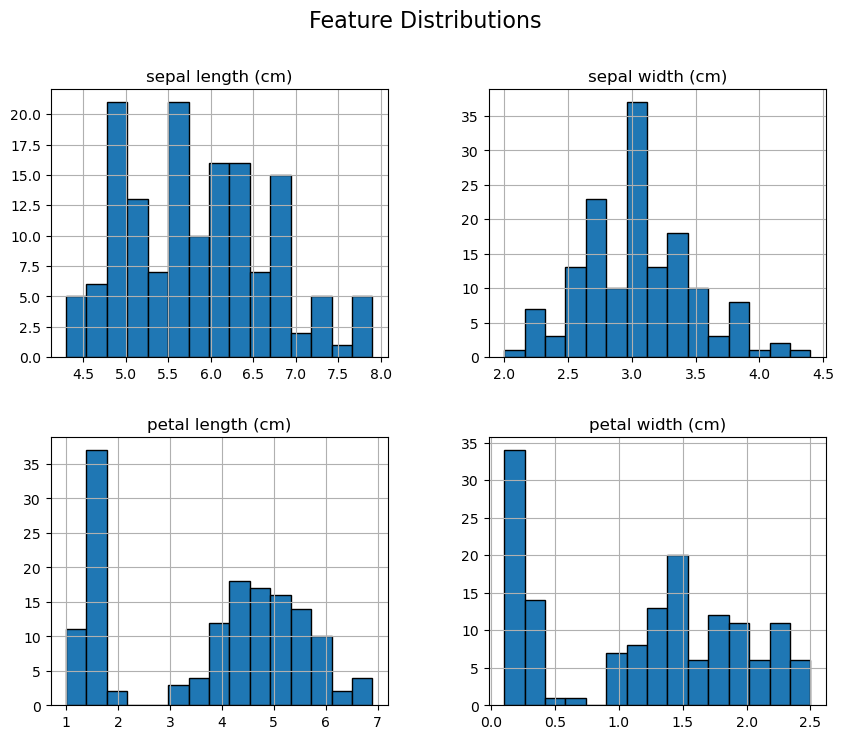

In [5]:
df[iris.feature_names].hist(figsize=(10,8), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


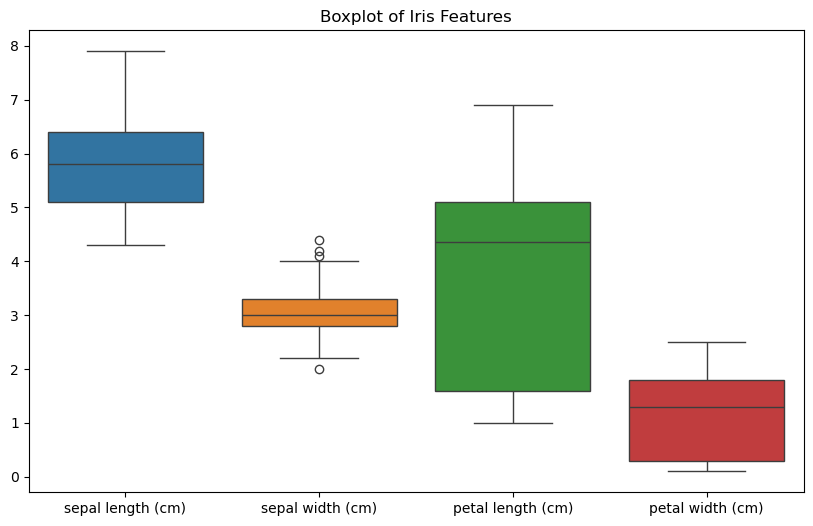

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[iris.feature_names])
plt.title("Boxplot of Iris Features")
plt.show()


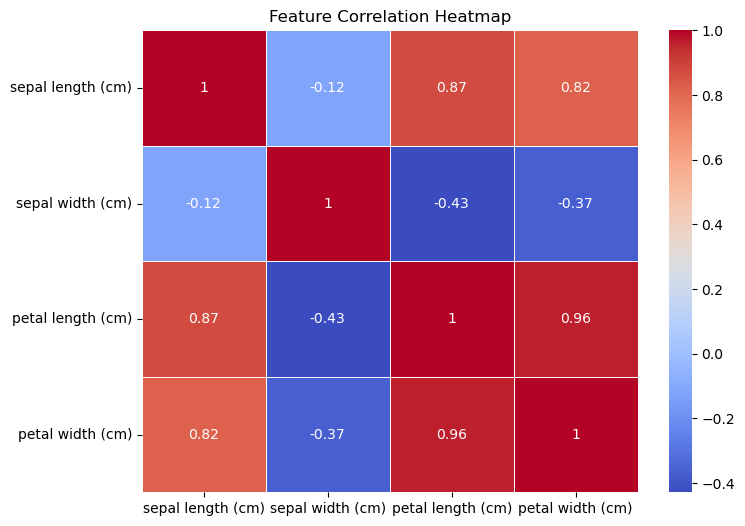

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df[iris.feature_names].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [12]:
# PROJECT 1

X = df[iris.feature_names]
y = df['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
# Initialize
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [14]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-score: 0.97

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



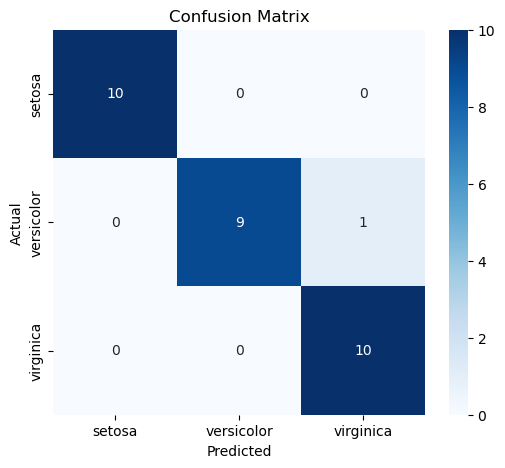

In [15]:

cm = confusion_matrix(y_test, y_pred, labels=['setosa', 'versicolor', 'virginica'])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa','versicolor','virginica'], yticklabels=['setosa','versicolor','virginica'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
